In [ ]:
!nvidia-smi

Mon Oct 14 19:25:48 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!mkdir dataset

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!cp -r /content/gdrive/MyDrive/TaylorSwift.yolov8/train/images ./

In [ ]:
!cp -r /content/gdrive/MyDrive/TaylorSwift.yolov8/valid ./

In [ ]:
!cp -r /content/gdrive/MyDrive/TaylorSwift.yolov8/train/labels ./

# Instalação das ferramentas do yolov8 e configuração do arquivo yaml

In [ ]:
!pip install ultralytics

In [ ]:
from ultralytics import YOLO
import os
import cv2
import matplotlib.pyplot as plt

In [ ]:
!touch configs_modelo.yaml

In [ ]:
%%writefile configs_modelo.yaml
path: '/content/dataset'
train: 'train/'
valid: 'valid/'
test: # opcional

nc: 2
names: ['Taylor', 'Unidentity']



Overwriting configs_modelo.yaml


Treinamento do Modelo

In [ ]:
diretorio_raiz = '/content/'
arquivo_config = os.path.join(diretorio_raiz, 'configs_modelo.yaml')

In [ ]:
arquivo_config

'/content/configs_modelo.yaml'

In [ ]:
model = YOLO('yolov8s.yaml')

In [ ]:
resultados = model.train(data=arquivo_config, epochs=10, imgsz=640, name='modelo_taylor_yolov8')

Ultralytics 8.3.13 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/configs_modelo.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=modelo_taylor_yolov83, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_c

100%|██████████| 755k/755k [00:00<00:00, 106MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 296MB/s]


AMP: checks passed ✅


train: Scanning /content/dataset/train/labels... 274 images, 24 backgrounds, 0 corrupt: 100%|██████████| 274/274 [00:00<00:00, 2056.22it/s]

train: New cache created: /content/dataset/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 21, len(boxes) = 411. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.18 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/dataset/valid/labels... 78 images, 6 backgrounds, 0 corrupt: 100%|██████████| 78/78 [00:00<00:00, 1186.48it/s]

val: New cache created: /content/dataset/valid/labels.cache


Plotting labels to runs/detect/modelo_taylor_yolov83/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 63 weight(decay=0.0), 70 weight(decay=0.0005), 69 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/modelo_taylor_yolov83
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      4.22G      2.989      4.574      4.211          3        640: 100%|██████████| 18/18 [00:09<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.07s/it]

                   all         78        112    0.00318      0.571    0.00378    0.00119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      4.18G      2.819      4.477      4.156          2        640: 100%|██████████| 18/18 [00:04<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.94it/s]

                   all         78        112     0.0032      0.571    0.00596    0.00189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10       4.2G      2.766       4.28      3.968          3        640: 100%|██████████| 18/18 [00:06<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.95it/s]


                   all         78        112    0.00324      0.571     0.0141    0.00484

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      4.16G      2.765      4.114      3.784          2        640: 100%|██████████| 18/18 [00:04<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.89it/s]

                   all         78        112    0.00315       0.57     0.0303    0.00998



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      4.32G      2.816      3.913       3.62          3        640: 100%|██████████| 18/18 [00:05<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.33it/s]

                   all         78        112    0.00378      0.658     0.0298    0.00751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      4.18G      2.668      3.809      3.524          2        640: 100%|██████████| 18/18 [00:06<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.96it/s]

                   all         78        112      0.516      0.176     0.0185    0.00512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      4.01G      2.641      3.743      3.484          1        640: 100%|██████████| 18/18 [00:04<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.28it/s]

                   all         78        112      0.533      0.108     0.0303    0.00766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      4.17G      2.642      3.581      3.424          3        640: 100%|██████████| 18/18 [00:06<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.02it/s]

                   all         78        112      0.114     0.0882     0.0715     0.0188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      4.17G      2.629      3.583      3.413          1        640: 100%|██████████| 18/18 [00:04<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.02it/s]

                   all         78        112      0.201      0.184      0.166     0.0483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      4.19G      2.556      3.412      3.317          2        640: 100%|██████████| 18/18 [00:05<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.32it/s]

                   all         78        112      0.276      0.242      0.261      0.084



10 epochs completed in 0.025 hours.
Optimizer stripped from runs/detect/modelo_taylor_yolov83/weights/last.pt, 19.9MB
Optimizer stripped from runs/detect/modelo_taylor_yolov83/weights/best.pt, 19.9MB

Validating runs/detect/modelo_taylor_yolov83/weights/best.pt...
WARNING ⚠️ validating an untrained model YAML will result in 0 mAP.
Ultralytics 8.3.13 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s summary (fused): 186 layers, 9,828,438 parameters, 0 gradients, 23.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.20it/s]


                   all         78        112      0.275       0.24      0.261     0.0839
                Taylor         48         51      0.265      0.383      0.325     0.0953
            Unidentity         28         61      0.284     0.0984      0.198     0.0725
Speed: 0.2ms preprocess, 4.5ms inference, 0.0ms loss, 4.3ms postprocess per image
Results saved to runs/detect/modelo_taylor_yolov83


In [ ]:
dir_resultados = '/content/runs/detect/modelo_taylor_yolov83'

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
!yolo task=detect mode=val model={dir_resultados}/weights/best.pt name=modelo_taylor_yolo_eval data=configs_modelo.yaml

Ultralytics 8.3.13 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s summary (fused): 186 layers, 9,828,438 parameters, 0 gradients, 23.3 GFLOPs
val: Scanning /content/dataset/valid/labels.cache... 78 images, 6 backgrounds, 0 corrupt: 100% 78/78 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 5/5 [00:03<00:00,  1.58it/s]
                   all         78        112      0.274       0.24      0.261     0.0844
                Taylor         48         51      0.265      0.382      0.326     0.0955
            Unidentity         28         61      0.284     0.0984      0.196     0.0733
Speed: 5.2ms preprocess, 12.4ms inference, 0.0ms loss, 11.1ms postprocess per image
Results saved to runs/detect/modelo_taylor_yolo_eval2
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
def mostrar(img):
    fig = plt.gcf()
    fig.set_size_inches(16, 10)
    plt.axis("off")
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

In [ ]:
resultados_graficos

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

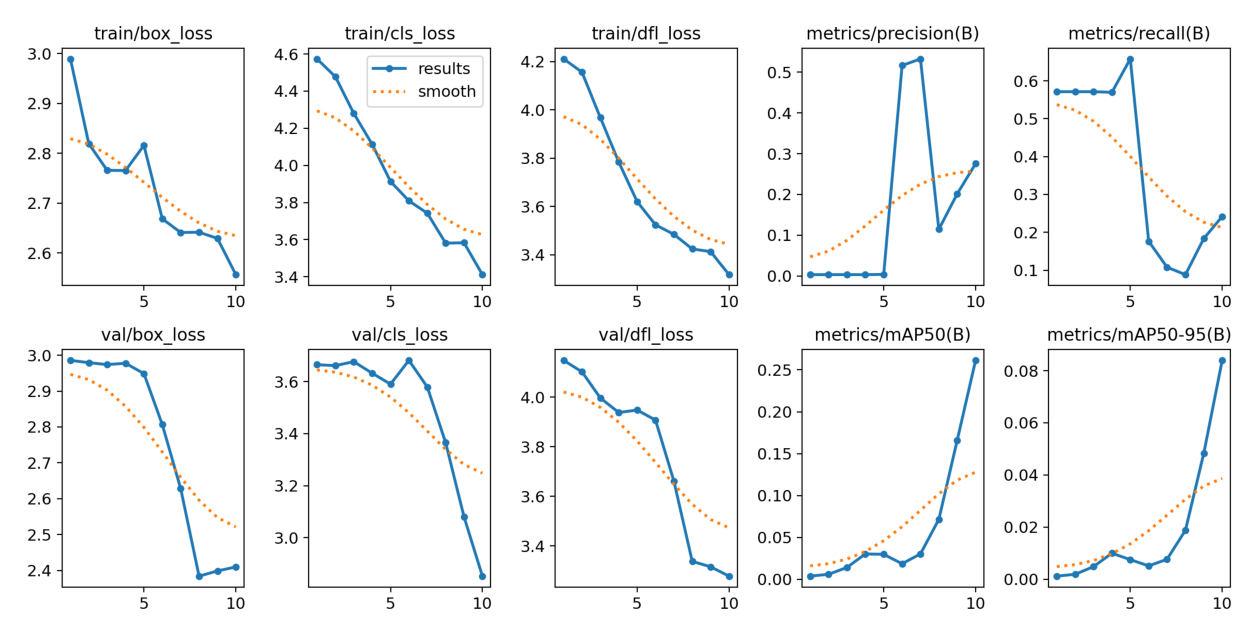

In [ ]:
resultados_graficos = cv2.imread(os.path.join(dir_resultados, 'results.png'))
mostrar(resultados_graficos)

In [ ]:
dir_resultados_val = '/content/runs/detect/modelo_taylor_yolo_eval2'

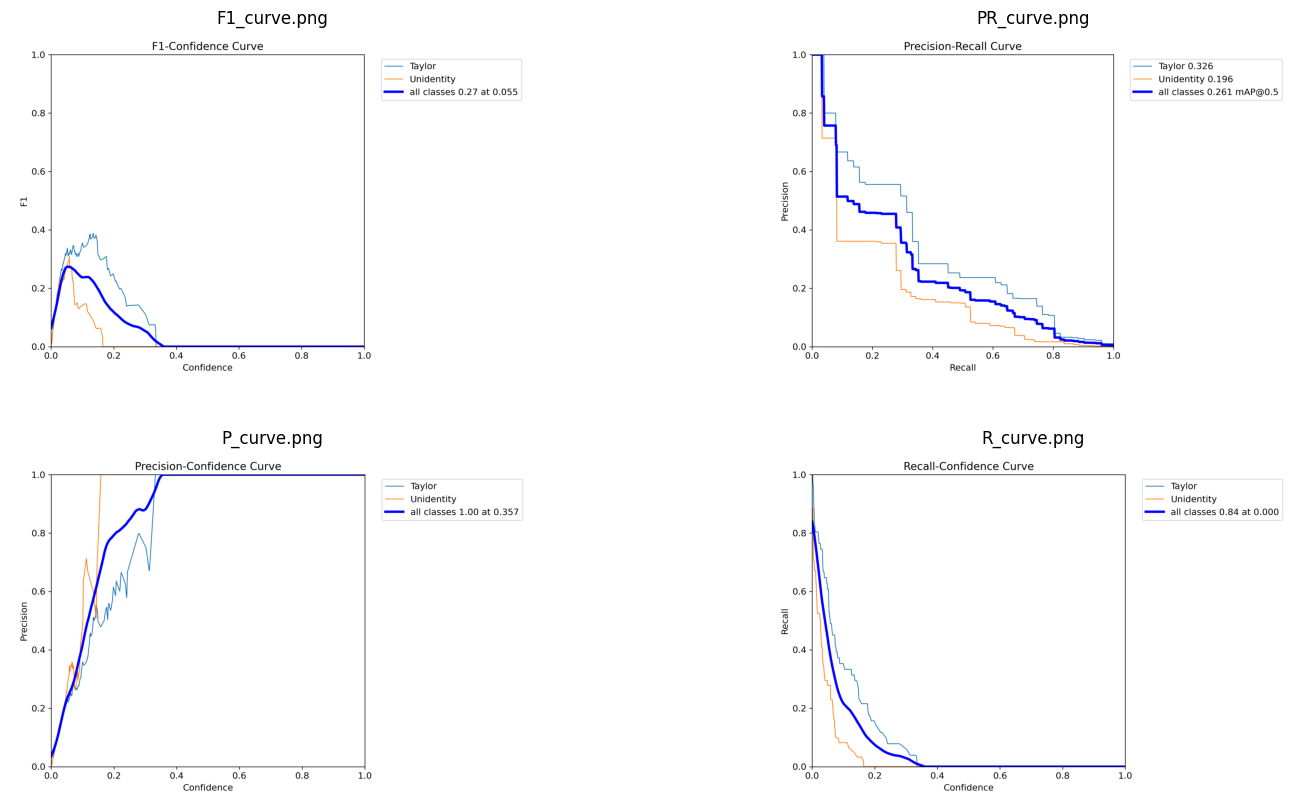

In [ ]:
imgs = ['F1_curve.png', 'PR_curve.png', 'P_curve.png', 'R_curve.png']
plt.figure(figsize=(18, 10))
for i, img in enumerate(imgs):
    #print(i, img)
    grafico = cv2.imread(os.path.join(dir_resultados_val, img))
    #print(grafico)
    grafico = cv2.cvtColor(grafico, cv2.COLOR_BGR2RGB)
    plt.subplot(2, 2, i+1)
    plt.title(imgs[i])
    plt.imshow(grafico)
    plt.axis('off')
plt.show()

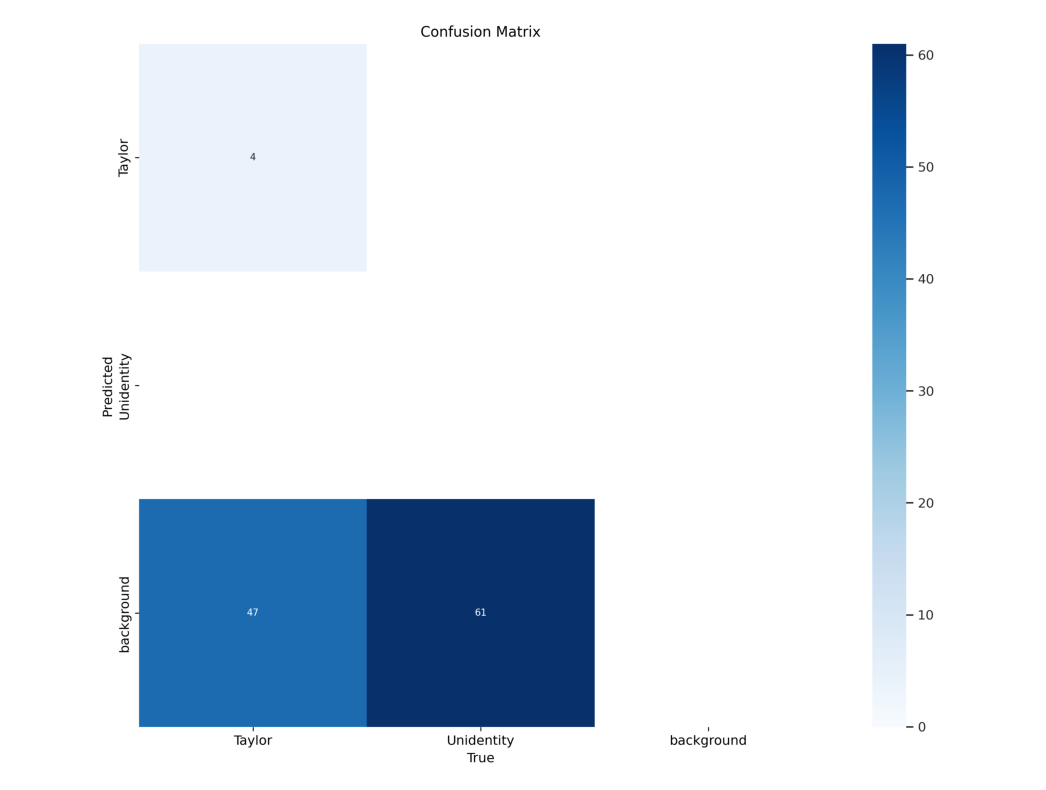

In [ ]:
matriz_confusao = cv2.imread(os.path.join(dir_resultados_val, 'confusion_matrix.png'))
mostrar(matriz_confusao)

In [ ]:
!mkdir imagens_teste

In [ ]:
!yolo task=detect mode=predict model={dir_resultados}/weights/best.pt source='/content/imagens_teste' save=True conf=0.25

Ultralytics 8.3.13 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s summary (fused): 186 layers, 9,828,438 parameters, 0 gradients, 23.3 GFLOPs

image 1/2 /content/imagens_teste/images-7-_jpeg.rf.b3662d978684f2232094dc619fd91911.jpg: 640x640 (no detections), 15.1ms
image 2/2 /content/imagens_teste/taylor-swift-1975_jpg.rf.d1890a49a7c974181c0c2e4770ad1092.jpg: 640x640 (no detections), 15.1ms
Speed: 4.0ms preprocess, 15.1ms inference, 15.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict13
💡 Learn more at https://docs.ultralytics.com/modes/predict


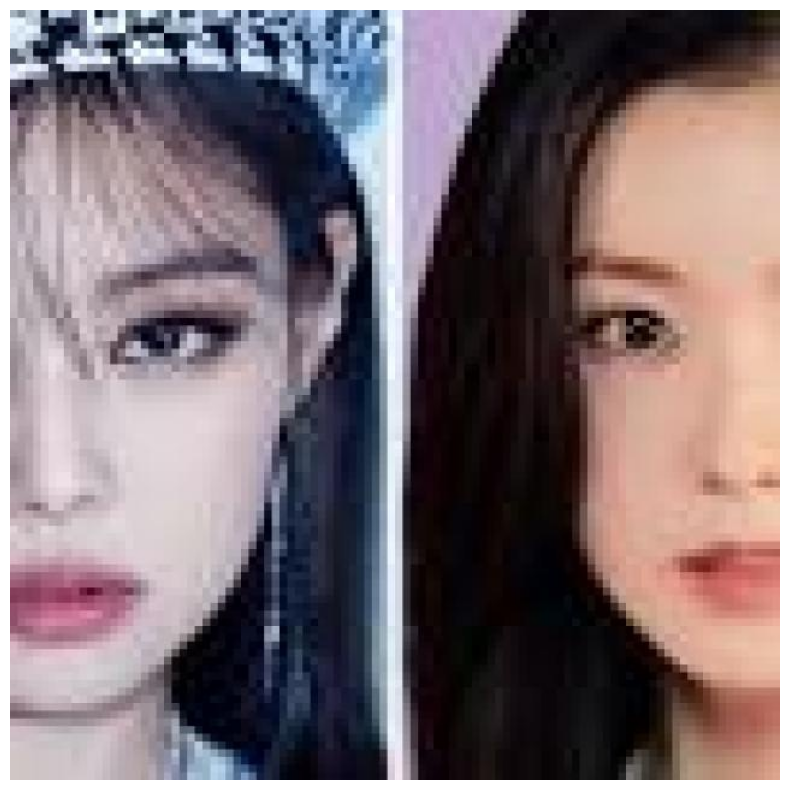

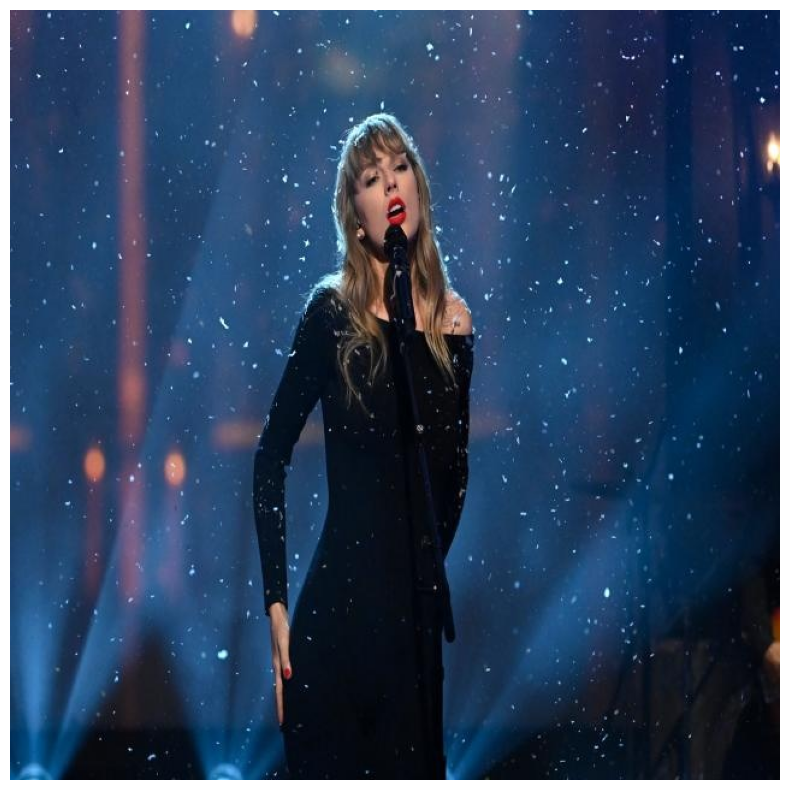

In [ ]:
dir_predicoes = '/content/runs/detect/predict13'
caminhos = [os.path.join(dir_predicoes, f) for f in os.listdir(dir_predicoes)]
#print(caminhos)
for caminho_imagem in caminhos:
    imagem = cv2.imread(caminho_imagem)
    mostrar(imagem)